In [ ]:
!pip install tensorflow==2.12 # Install tensorflow 2.12

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 7.8 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.0
    Uninstalling wrapt-1.17.0:
      Successfully uninstalled wrapt-1.17.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Un

Testing image: /content/3853858281.jpg


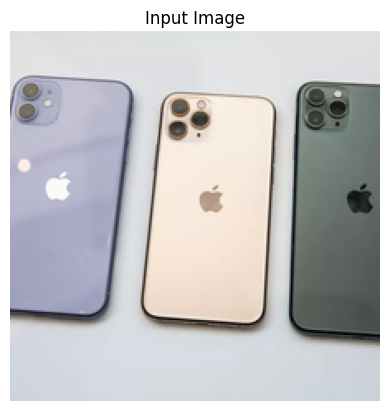

1/1 [==============================] - 1s 1s/step
Class: 0 iphone
Confidence Score: 0.97066194
Testing image: /content/1200px-IPhone_8_vector.svg.png


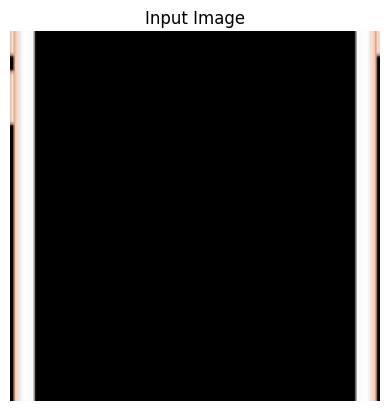

1/1 [==============================] - 0s 49ms/step
Class: 0 iphone
Confidence Score: 0.9841287
Testing image: /content/Screenshot 2024-08-20 at 10.26.20 PM.png


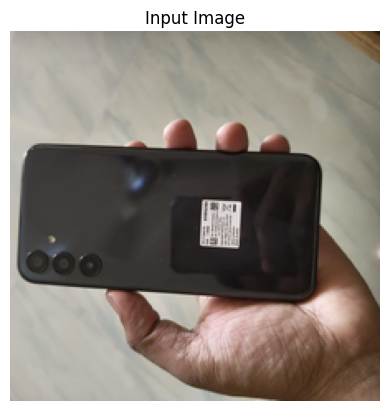

1/1 [==============================] - 0s 80ms/step
Class: 1 Galaxy
Confidence Score: 0.99994195


In [ ]:

from keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image, ImageOps  # Install pillow instead of PIL
import numpy as np
import matplotlib.pyplot as plt  # Library for displaying images

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = load_model("/content/keras_model.h5", compile=False)

# Load the labels
with open("/content/labels.txt", "r") as file:
    class_names = file.readlines()

# Function to predict the class of an image
def predict_image(image_path):
    try:
        # Open and preprocess the image
        image = Image.open(image_path).convert("RGB")
        size = (224, 224)
        image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

        # Display the image
        plt.imshow(image)
        plt.axis("off")  # Hide axes for cleaner display
        plt.title("Input Image")
        plt.show()

        # Turn the image into a numpy array
        image_array = np.asarray(image)

        # Normalize the image
        normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

        # Prepare the array for prediction
        data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
        data[0] = normalized_image_array

        # Predict the class using the model
        prediction = model.predict(data)
        index = np.argmax(prediction)
        class_name = class_names[index]
        confidence_score = prediction[0][index]

        # Print prediction and confidence score
        print("Class:", class_name.strip())  # Remove any trailing newlines
        print("Confidence Score:", confidence_score)

    except Exception as e:
        print(f"Error processing image {image_path}: {e}")

# List of image paths to test
image_paths = ["/content/3853858281.jpg", "/content/1200px-IPhone_8_vector.svg.png", "/content/Screenshot 2024-08-20 at 10.26.20 PM.png"]  # Add your image paths here

# Loop through each image and predict
for image_path in image_paths:
    print(f"Testing image: {image_path}")
    predict_image(image_path)